# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

El objetivo de este proyecto en determinar que factores influyen en el precio de un vehiculo. para determinar el resultado se tiene que hacer los siguientes pasos para tener una base confiable;

1. Analisar la informacion otorgada
2. Preprocesamiento de dato
3. Moldeamiento de los datos de acuerdo a las necesidades de estudio
4. Analisis exploratorio 




### Introduccion

Para poder estudiar los datos otorgados y descubrir el objetivo de esto, primero que nada se debe visualizar toda la informacion otorgada para determinar si los datos son confiables. Segundo, en caso que los datos esten incompletos se deberan corregir y eliminar los datos que no agregar valor.
Por ultimo, cuando tengamos una base confiable , analizaremos todos los factores presentes y mediante un analisis exploratorio determinaremos que factores influyen en el precio


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


print("Setup Complete")


Setup Complete


### Cargar datos

Importar datos y que se pueda visualizar en diferentes plataformas

In [2]:
# Carga el archivo de datos en un DataFrame
try: #anaconda
    df = pd.read_csv('moved_vehicles_us.csv')
except: #jupyter
    df = pd.read_csv('/datasets/vehicles_us.csv')



In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [4]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Del la base de datos podemos concluir lo siguiente;
1. En general existen 51525 observaciones 
2. los tipos de datos son:  4 reales , 2 enteros y 7 objetos
3. is_4wd figura como decimal pero deberia ser booleano (0 o 1)
4. date_posted se debe convertir a formato fecha
5. Hay datos ausentes en model_year, cylinders, odomoter, paint_color, is_4wd

In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


1. En la columna de precio, el minimo es 1 dolar, este dato efectivamente es un error que debe ser corregido.
2. en la columna `id_4wd` contiene solo dos categorias, 1 y 0

### Conclusiones y siguientes pasos

Las columnas Model_Year, Cylinders, odomoter y paint color tienen valores ausentes, para solucionar esto se deberan eliminar los datos que no dan mucho valor y completar los campos vacios con el valor que más se adecua, pudiendo ser la mediana o un texto determinado.
ademas de lo expuesto anteriormente, ademas, existen valores atipicos, que influyen en las variables.  para esto, se deberá revisar los valores aticpicos y determinar la manera en qué seran  trabajados.



# Paso 2. Preprocesamiento de datos

## Tratar los valores ausentes (si hay)

Las columnas que tienen valores ausentes son las siguientes;
- is_4wd
- paint_color
- odometer
- cylinders
- model_year

In [6]:
(df.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Variables,is_4wd,paint_color,odometer,cylinders,model_year,price,model,condition,fuel,transmission,type,date_posted,days_listed
Missing,25953,9267,7892,5260,3619,0,0,0,0,0,0,0,0


#### is_4wd: Como es un valor booleano, se reemplazará los valores vacios por 0

In [7]:
df['is_4wd']= df['is_4wd'].fillna(0)

In [8]:
df['is_4wd'].isnull().count()

51525

#### Paint_color:

In [9]:
df['paint_color'].value_counts()


white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [10]:
df['paint_color']=df['paint_color'].fillna('missing')

In [11]:
df['paint_color'].isnull().count()

51525

#### odometer

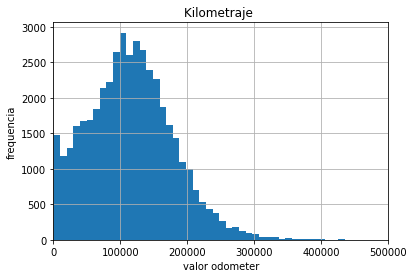

In [12]:
df['odometer'].dropna().astype('int').hist(bins=100)
plt.xlim(0,500000)
plt.title("Kilometraje ")
plt.xlabel('valor odometer')
plt.ylabel('frequencia');

In [13]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [14]:
df[df['odometer']==0].count()

price           185
model_year      172
model           185
condition       185
cylinders       166
fuel            185
odometer        185
transmission    185
type            185
paint_color     185
is_4wd          185
date_posted     185
days_listed     185
dtype: int64

In [15]:
df[df['odometer']== 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,missing,0.0,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,0.0,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,missing,0.0,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39


In [16]:
odo_o=df[df['odometer']== 0]
odo_o.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,missing,0.0,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,0.0,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,missing,0.0,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,0.0,2018-08-01,20
2077,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,0.0,2018-07-02,24
2506,3000,2006.0,honda civic,good,NaN,gas,0.0,automatic,sedan,silver,0.0,2018-06-02,37
3640,4200,NaN,nissan murano,good,6.0,gas,0.0,automatic,SUV,red,1.0,2018-08-24,21
4186,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,0.0,2018-12-06,71


In [17]:
odo_o.groupby('model_year')['odometer'].size()

model_year
1962.0     1
1966.0     2
1968.0     1
1969.0     2
1970.0     1
1971.0     1
1984.0     1
1988.0     2
1991.0     1
1992.0     1
1994.0     2
1995.0     1
1996.0     1
1999.0     3
2000.0     4
2001.0     2
2002.0    16
2003.0     9
2004.0     4
2005.0     9
2006.0     6
2007.0     1
2008.0    10
2009.0     6
2010.0    15
2011.0    14
2012.0     3
2013.0     4
2014.0    11
2015.0    16
2016.0     7
2017.0    12
2018.0     3
Name: odometer, dtype: int64

En total hay 185 autos con 0 kilometros, pero eso no quiere decir que sean nuevos autos debido al año del modelo. los remplazaremos por NAN y luego calcularemos la mediana segun la agrupacion por modelo y año

In [18]:
df.loc[df['odometer'] == 0, 'odometer'] = np.nan

In [19]:
df['odometer'] = df.groupby(['model','type'])['odometer'].apply(lambda x: x.fillna(x.median()))

In [20]:
df['odometer'].isnull().sum()

57

los 57 restantes no se encuentran en nuestro modelo utlizado para el calculo de la mediana. ante esto los excluiremos de nuestra base 

In [21]:
df = df.dropna(subset=['odometer'], axis=0)
df.reset_index(drop=True, inplace=True)

In [22]:
df['odometer'] = df.groupby('model')['odometer'].apply(lambda x: x.fillna(x.median()))

In [23]:
df['odometer'].isnull().sum()

0

In [24]:
df['odometer'].isnull().sum()

0

In [25]:
display(df.corr())

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.429756,0.297270,-0.391954,0.317716,-0.000555
model_year,0.429756,1.000000,-0.147865,-0.453677,0.043504,-0.005558
cylinders,0.297270,-0.147865,1.000000,0.094929,0.405921,0.005608
odometer,-0.391954,-0.453677,0.094929,1.000000,0.042043,0.002045
is_4wd,0.317716,0.043504,0.405921,0.042043,1.000000,0.002092
days_listed,-0.000555,-0.005558,0.005608,0.002045,0.002092,1.000000


##### cylinders

In [26]:
df['cylinders']= df.groupby(['model','type'])['cylinders'].apply(lambda x: x.fillna(x.median()))

In [27]:
df['cylinders'].isnull().sum()

13

In [28]:
df = df.dropna(subset=['cylinders'], axis=0)
df.reset_index(drop=True, inplace=True)

In [29]:
df['cylinders'].isnull().sum()

0

#### Model_year

In [30]:
df['model_year'].value_counts()

2013.0    3515
2012.0    3467
2014.0    3446
2011.0    3373
2015.0    3321
          ... 
1948.0       1
1949.0       1
1954.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 67, dtype: int64

Creamos una columna con el año y la convertimos a formato fecha

In [31]:
df['date_posted']= pd.to_datetime(df['date_posted']) # convertir formato fecha
df['year_posted'] = df['date_posted'].dt.year    #crear una columna con solo el año

Calcular la diferencia de años entre el anuncio y el modelo del auto, y guardandola en una nueva columna

In [32]:
df['dif_years'] = df['year_posted'] - df['model_year']

Calculamos el uso de kilometraje por año, es la division de odometer con la diferencia de años sacado anteriormente

In [33]:
df['odometer_per_year'] = df['odometer'] / df['dif_years']

Calculamos le media de odometer_per_years por modelo y tipo de auto

In [34]:
odometer_per_year_dict = df.groupby(['model','type'])['odometer_per_year'].median().to_dict()

In [35]:
def fill_in_model_year(row):
    
    if np.isnan(row['model_year']):
        row['dif_years'] = row['odometer'] / odometer_per_year_dict[(row['model'], row['type'])]
        row['model_year'] = row['year_posted'] - row['dif_years']
    return row

In [36]:
df = df.apply(fill_in_model_year, axis=1)

In [37]:
df['model_year'].isnull().sum()

9

Esas 9 observaciones son unicas en la columna, y no pertenecen a la relacion creada. por eso es mejor excluirlas de nuestros datos

In [38]:
df = df.dropna(subset=['model_year'], axis=0)
df.reset_index(drop=True, inplace=True)

df.shape

(51446, 16)

In [39]:
df['model_year'].isnull().sum()

0

In [40]:
df.shape

(51446, 16)

Cambiar los tipos de datos

In [41]:
df['model_year'] = df['model_year'].astype('int')

Como ya usamos las columnas odometer_per_year  y dif_years y no las necesitaremos más, podemos eliminarlas

In [42]:
df = df.drop((['odometer_per_year','dif_years']), axis=1)
df.reset_index(drop=True, inplace=True)

df.shape

(51446, 14)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51446 entries, 0 to 51445
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51446 non-null  int64         
 1   model_year    51446 non-null  int64         
 2   model         51446 non-null  object        
 3   condition     51446 non-null  object        
 4   cylinders     51446 non-null  float64       
 5   fuel          51446 non-null  object        
 6   odometer      51446 non-null  float64       
 7   transmission  51446 non-null  object        
 8   type          51446 non-null  object        
 9   paint_color   51446 non-null  object        
 10  is_4wd        51446 non-null  float64       
 11  date_posted   51446 non-null  datetime64[ns]
 12  days_listed   51446 non-null  int64         
 13  year_posted   51446 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 5.5+ MB


In [44]:
(df.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Variables,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Corregir los tipos de datos

Vamos a reemplazar todos los tipos de datos que contienen float por int

In [45]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
year_posted              int64
dtype: object

In [46]:
for column in ['price','odometer','cylinders','is_4wd','days_listed']:
    df[column] = df[column].astype('int')

In [47]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [48]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
year_posted              int64
dtype: object

In [49]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,missing,True,2018-06-23,19,2018
1,25500,2012,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,126000,automatic,pickup,missing,False,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019


##### Revisar todas las columnas 

In [50]:
variable= "model_year"
print(df[variable].sort_values().unique())

[1908 1936 1948 1949 1950 1954 1955 1958 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


No hay errores en la columna, la unica observacion que genera inquietud es el año 1908.

In [51]:
variable= "condition"
print(df[variable].sort_values().unique())

['excellent' 'fair' 'good' 'like new' 'new' 'salvage']


In [52]:
variable= "cylinders"
print(df[variable].sort_values().unique())

[ 3  4  5  6  7  8 10 12]


In [53]:
variable= "fuel"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())

['diesel' 'electric' 'gas' 'hybrid' 'other']
-------------------------------------------------
gas         47255
diesel       3669
hybrid        408
other         108
electric        6
Name: fuel, dtype: int64


In [54]:
variable= "odometer"
print(df[variable].sort_values().unique())

[     1      2      3 ... 920000 980000 990000]


Presentan valores muy altos que tendran que ser revisados despues

In [55]:
variable= "transmission"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())

['automatic' 'manual' 'other']
-------------------------------------------------
automatic    46825
manual        2827
other         1794
Name: transmission, dtype: int64


No presenta datos problematicos

In [56]:
variable= "type"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())

['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']
-------------------------------------------------
SUV            12401
truck          12348
sedan          12150
pickup          6985
coupe           2300
wagon           1536
mini-van        1160
hatchback       1046
van              588
convertible      444
other            252
offroad          213
bus               23
Name: type, dtype: int64


Convertiremos todos los campos mayuscula en minuscula

In [57]:
df['type']=df['type'].str.lower()

In [58]:
print(df[variable].value_counts())

suv            12401
truck          12348
sedan          12150
pickup          6985
coupe           2300
wagon           1536
mini-van        1160
hatchback       1046
van              588
convertible      444
other            252
offroad          213
bus               23
Name: type, dtype: int64


In [59]:
variable= "paint_color"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'missing' 'orange'
 'purple' 'red' 'silver' 'white' 'yellow']
-------------------------------------------------
white      10023
missing     9256
black       7653
silver      6240
grey        5031
blue        4472
red         4415
green       1393
brown       1223
custom      1153
yellow       254
orange       231
purple       102
Name: paint_color, dtype: int64


In [60]:
variable= "is_4wd"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())

[False  True]
-------------------------------------------------
False    25884
True     25562
Name: is_4wd, dtype: int64


Correctos los datos, es una expresion booleana en el campo `"is_4wd"`

In [61]:
variable= "days_listed"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())
print('-------------------------------------------------')


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 197 199
 200 201 202 203 204 205 206 207 208 209 210 213 217 221 223 225 226 228
 233 236 240 243 244 252 256 261 263 267 271]
-------------------------------------------------
18     959
24     947
22    

In [62]:
variable= "year_posted"
print(df[variable].sort_values().unique())
print('-------------------------------------------------')
print(df[variable].value_counts())
print('-------------------------------------------------')


[2018 2019]
-------------------------------------------------
2018    35632
2019    15814
Name: year_posted, dtype: int64
-------------------------------------------------


No presenta ningun error el campo `year_posted`

In [63]:
variable= "model"
print(df[variable].sort_values().unique())

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150' 'ford f-250'
 'ford f-250 sd' 'ford f-250 super duty' 'ford f-350 sd' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'ford ranger' 'ford taurus' 'gmc acadia' 'gmc sierra' '

El primer elemto es la marca y luego viene el modelo. se creará una funcion que haga esta separacion

In [64]:
def brand(row):
    """
    Tome un vehiculo y devolverá la marca
    """  
    model = row['model']
    model_split = model.split(' ') # hay que colocar el caracter de separacion, en este caso es un campo vacio 
    brand = model_split[0] # tomamos el indice 0
    return brand

In [65]:
df['brand'] = df.apply(brand, axis=1) #agrega la columna creada en la base

In [66]:
df['brand'].value_counts()

ford          12661
chevrolet     10605
toyota         5439
honda          3483
ram            3314
jeep           3278
nissan         3206
gmc            2377
subaru         1272
dodge          1255
hyundai        1171
volkswagen      868
chrysler        838
kia             584
cadillac        322
buick           270
bmw             267
acura           236
Name: brand, dtype: int64

In [67]:
print(df.describe())

               price    model_year     cylinders       odometer   days_listed  \
count   51446.000000  51446.000000  51446.000000   51446.000000  51446.000000   
mean    12116.807604   2009.766201      6.122186  115770.581211     39.557264   
std     10025.236092      6.171042      1.658138   60372.031809     28.210467   
min         1.000000   1908.000000      3.000000       1.000000      0.000000   
25%      5000.000000   2006.000000      4.000000   77447.000000     19.000000   
50%      9000.000000   2011.000000      6.000000  115163.000000     33.000000   
75%     16800.000000   2014.000000      8.000000  149000.000000     53.000000   
max    375000.000000   2019.000000     12.000000  990000.000000    271.000000   

        year_posted  
count  51446.000000  
mean    2018.307390  
std        0.461417  
min     2018.000000  
25%     2018.000000  
50%     2018.000000  
75%     2019.000000  
max     2019.000000  


Datos a revisar más adelante:

`price`=  tiene un minimo de 1 que debe ser corregido

`Model_years`= Hay que revisar el modelo de 1908

`odometer`= Hay que revisar los valores muy altos


### Duplicados

In [68]:
print(df.duplicated().sum())

0


No hay duplicados 

# Paso 3. Calcula y añade a la tabla lo siguiente:

## Enriquecer datos

In [69]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['month_posted'] = df['date_posted'].dt.month
df['day_posted'] = df['date_posted'].dt.dayofweek


In [70]:
# Agrega los años del vehículo cuando el anuncio se colocó

df['age_in_years_posted'] = (df['date_posted'] - pd.to_datetime(df.model_year, format='%Y'))/ np.timedelta64(1, 'Y')
df['age_in_years_posted'] = np.ceil(df['age_in_years_posted'])

In [71]:
# Agrega el millaje promedio del vehículo por año

df['avg_miles_per_year'] = df['odometer']/df['age_in_years_posted']

In [72]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

condition_dict = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0} # creamos un diccionario


In [73]:
df['condition'] = df['condition'].map(condition_dict)
df['condition'].value_counts()

3    24714
2    20133
4     4738
1     1603
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [74]:
# imprime la información general/resumida sobre el DataFrame

df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_in_years_posted,avg_miles_per_year
count,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,51446.000000,5.144600e+04
mean,12116.807604,2009.766201,2.637290,6.122186,115770.581211,39.557264,2018.307390,6.628737,3.005559,9.539925,inf
std,10025.236092,6.171042,0.712574,1.658138,60372.031809,28.210467,0.461417,3.474279,1.997668,6.181921,NaN
min,1.000000,1908.000000,0.000000,3.000000,1.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,3.333333e-02
25%,5000.000000,2006.000000,2.000000,4.000000,77447.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,9.568556e+03
50%,9000.000000,2011.000000,3.000000,6.000000,115163.000000,33.000000,2018.000000,7.000000,3.000000,9.000000,1.305462e+04
75%,16800.000000,2014.000000,3.000000,8.000000,149000.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,1.773799e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,6.000000,111.000000,inf


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51446 entries, 0 to 51445
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                51446 non-null  int64         
 1   model_year           51446 non-null  int64         
 2   model                51446 non-null  object        
 3   condition            51446 non-null  int64         
 4   cylinders            51446 non-null  int64         
 5   fuel                 51446 non-null  object        
 6   odometer             51446 non-null  int64         
 7   transmission         51446 non-null  object        
 8   type                 51446 non-null  object        
 9   paint_color          51446 non-null  object        
 10  is_4wd               51446 non-null  bool          
 11  date_posted          51446 non-null  datetime64[ns]
 12  days_listed          51446 non-null  int64         
 13  year_posted          51446 non-

In [76]:
# imprimir una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,brand,month_posted,day_posted,age_in_years_posted,avg_miles_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,missing,True,2018-06-23,19,2018,bmw,6,5,8.0,18125.000000
1,25500,2012,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,ford,10,4,7.0,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,hyundai,2,3,7.0,15714.285714
3,1500,2003,ford f-150,1,8,gas,126000,automatic,pickup,missing,False,2019-03-22,9,2019,ford,3,4,17.0,7411.764706
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,chrysler,4,1,3.0,26967.666667


### conclusion

# Paso 4. Lleva a cabo el análisis exploratorio de datos siguiendo las siguientes instrucciones:

## Estudiar parámetros principales


Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Para lo siguiente voy  a generar la siguiente funcion para los graficos de los parametros

In [125]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, tittle,  bins, range):
    df.hist(column, bins=bins, range=range)
    plt.title(tittle)
    plt.xlabel(column)
    plt.ylabel("Frequency")

`Price`

In [101]:
df[df['price'] == df['price'].max()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,brand,month_posted,day_posted,age_in_years_posted,avg_miles_per_year
12488,375000.0,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,True,2018-05-19,21,2018,nissan,5,5,20.0,5750.0


In [102]:
df['price'].describe()


count     51445.000000
mean      12309.535105
std        9931.393291
min           3.000000
25%        5400.000000
50%        9500.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

Al investigar sobre el modelo en internet, no figura ningun modelo con este precio. este numero pudo haber sido debido a un error humano o sistematico

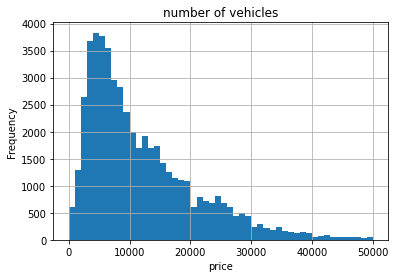

In [126]:
#
plot_histogram(df, "price",'number of vehicles', 50, (0, 50000))


In [116]:
len(df[df['price'] == 1])



0

Existen 798 vehiculos al precio de un dolar



In [105]:
df.loc[df['price'] == 1, 'price'] = np.nan



In [106]:
df['price'] = df.groupby(['model','type'])['price'].apply(lambda x: x.fillna(x.median()))


In [128]:
df['price'].isnull().sum()


0

In [129]:
df = df.dropna(subset=['price'], axis=0)
df.reset_index(drop=True, inplace=True)

In [130]:
df['price'].isnull().sum()

0

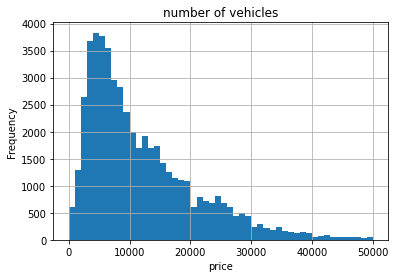

In [131]:
plot_histogram(df, "price",'number of vehicles', 50, (0, 50000))


`Los años del vehículo cuando el anuncio se colocó`

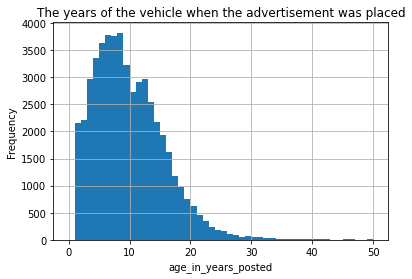

In [132]:
plot_histogram(df, "age_in_years_posted",'The years of the vehicle when the advertisement was placed', 50, (0, 50))

In [133]:
print('{:0.2f}'.format(df['age_in_years_posted'].mean()))  #Redondeo de decimales '{:0.2f}'

9.54


In [134]:
print('{:0.2f}'.format(df['age_in_years_posted'].median())) 

9.00


La media y mediana de los años del automivil son casi similares, se encuentra entre 8 y 9 años. tambien se identifico una cola larga en el grafico despues de los 30 años. 

`Odometer`

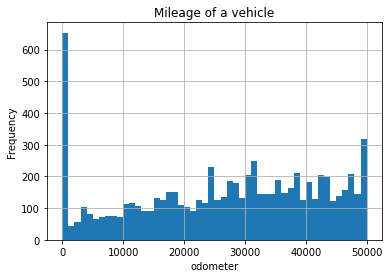

In [138]:
plot_histogram(df, "odometer",'Mileage of a vehicle', 50,(0, 50000) )


Al igual que el grafico anterior, el grafico presenta una cola larga qué tendra que ser trabajada más adelante

`CYLINDERS`

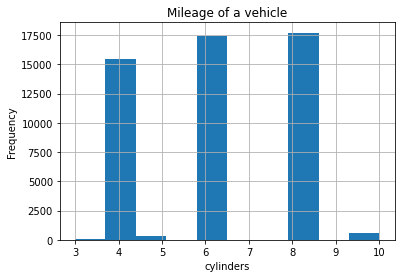

In [147]:
plot_histogram(df, "cylinders",'Mileage of a vehicle', 10, (3,10))


El grafico no representa ningun problema, las que tienen un numero menor que 4 puede ser debido a que sean autos antiguos. donde mas se concentran los valores es en 4 6 y 8 cilindros. no se visualiza valores atipicos

`Condition`

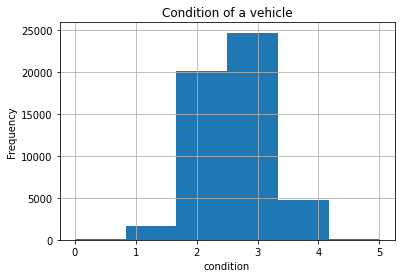

In [150]:
plot_histogram(df, "condition",'Condition of a vehicle', 6 , (0,5))

La mayoria del detalle de la descricpcion se encuentra en bueno y como nuevo. veamos si la condicion del auto esta relacionado con el precio


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se creo la siguiente funcion 
    
    def plot_histogram(df, column, tittle,  bins, range):
    df.hist(column, bins=bins, range=range)
    plt.title(tittle)
    plt.xlabel(column)
    plt.ylabel("Frequency")
</div>

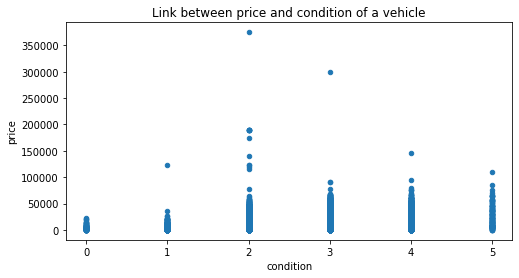

In [93]:
df.plot(x='condition', y='price', kind='scatter', figsize=(8,4))
plt.title('Link between price and condition of a vehicle');

No existe una relacion muy  significativa entre el precio y condicion, eso debe depender de otros factoresi

## Estudiar y tratar valores atípicos

Con respecto a nuestro analisis anterior sobre las variables Cylinndersrs y condition  las distribuciones parecian nornmal, sin ningun valor atipico. habra que sacar valores atipicos de las columnas precio, Odomoter y  Age_in_years_posted.

In [151]:
q1_price= df['price'].quantile(0.25)
q3_price= df['price'].quantile(0.75)
iqr_price= q3_price-q1_price

q1_age_in_years_posted= df['age_in_years_posted'].quantile(0.25)
q3_age_in_years_posted= df['age_in_years_posted'].quantile(0.75)
iqr_age_in_years_posted=q3_age_in_years_posted - q1_age_in_years_posted

q1_odometer= df['odometer'].quantile(0.25)
q3_odometer= df['odometer'].quantile(0.75)
iqr_odometer= q3_odometer - q1_odometer


# Determina los límites inferiores para valores atípicos

Para determinar los limites inferiores tendremos que detectar los cuartiles inferiores

In [152]:
inferior_limit = np.zeros(len(df), dtype=bool) + True
for feature in ['price','odometer','age_in_years_posted']:
    q25 = df[feature].quantile(0.25)
    q75 = df[feature].quantile(0.75)
    iqr = q75 - q25
    # calculate the outlier cutoff and upper limit
    cut_off = iqr * 1.5
    upper = q75 + cut_off
    inferior_limit[np.where(df[feature]>upper)] = False


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se modificó por inferior_limit
</div>

In [153]:
df_filtered = df[inferior_limit]
df_filtered.dropna(how='all', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

In [154]:
df_filtered.shape

(48190, 19)

## Estudiar parámetros principales sin valores atípicos

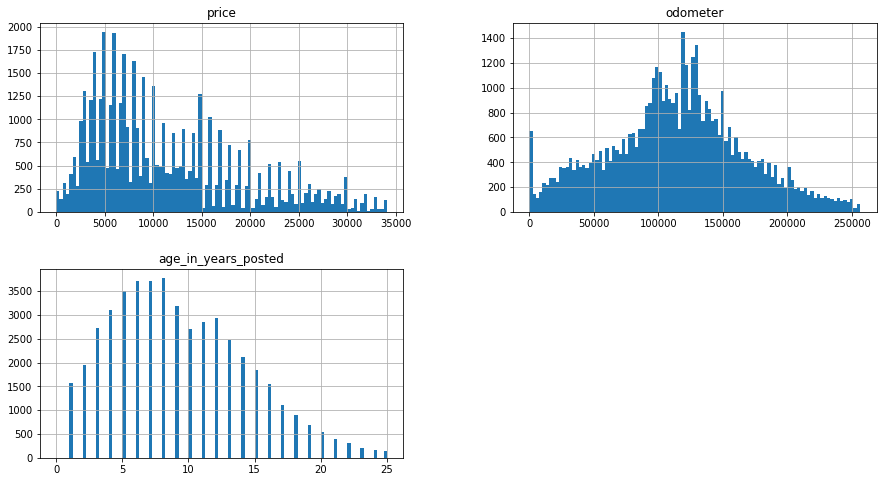

In [98]:
df_filtered[['price', 'odometer', 'age_in_years_posted']].hist(bins=100, figsize=(15,8));

Las largas colas de valores elevados para estas dos características ya no son visibles, lo que indica que sus distribuciones aparentan ser más normales y menos sesgadas en comparación con el pasado.

## Periodo de colocación de los anuncios


In [99]:
df_filtered['days_listed'].describe()

count    48190.000000
mean        39.549533
std         28.221238
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

q1 los anuncios menos largos fueron de  19 dias y  los mas largos  53 dias  (q3). la mediana es de 33 dias y la media  de 39 dias

In [156]:
#Describe el periodo de colocación habitual de un anuncio. 
df_filtered['days_listed'].describe()['75%']

53.0

El Quantil superior es de 53 dias

In [157]:
df_filtered.query('days_listed>60')['paint_color'].value_counts(normalize=True)*100

white      19.250297
missing    18.007994
black      15.015664
silver     12.228584
grey        9.960030
blue        9.052609
red         8.112780
green       2.905909
brown       2.365777
custom      2.030896
yellow      0.421303
orange      0.399698
purple      0.248461
Name: paint_color, dtype: float64

In [158]:
df.query('days_listed<60')['paint_color'].value_counts(normalize=True)*100

white      19.472700
missing    17.994222
black      14.816343
silver     12.208978
grey        9.786118
red         8.666942
blue        8.598966
green       2.677769
brown       2.350028
custom      2.291763
yellow      0.485543
orange      0.458838
purple      0.191789
Name: paint_color, dtype: float64

El percentil 25 (Q1) corresponde a 19 días, lo que significa que el 25% de los anuncios se vendieron en menos de 19 días. Por lo tanto, podemos considerar que un anuncio que dura menos de 19 días es anormalmente corto.

El percentil 75 (Q3) corresponde a 53 días, lo que significa que el 75% de los anuncios se vendieron en menos de 53 días. Por lo tanto, podemos considerar que un anuncio que dura más de 53 días es anormalmente largo.

Podemos usar estos valores como una medida aproximada de lo que se considera "normal" en términos de la duración de un anuncio.

## Precio promedio por cada tipo de vehículo

In [159]:
vehicle_grouped = df_filtered.pivot_table(index='type', values='price', aggfunc=['count','mean'])

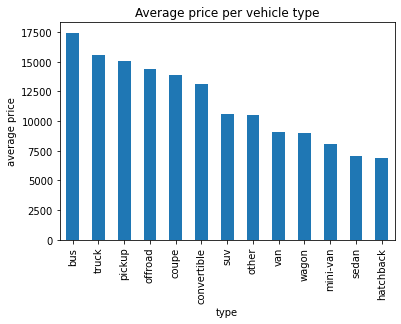

In [160]:
vehicle_grouped['mean'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Average price per vehicle type')
plt.ylabel('average price');

Basándonos en el gráfico de barras anterior, los camiones y las camionetas parecen ser los más costosos en promedio, lo cual resulta lógico ya que son los vehículos más grandes.

A continuación, generaremos un gráfico que muestre la relación entre el número de anuncios y el tipo de vehículo, y así identificar los dos tipos con mayor cantidad de anuncios.

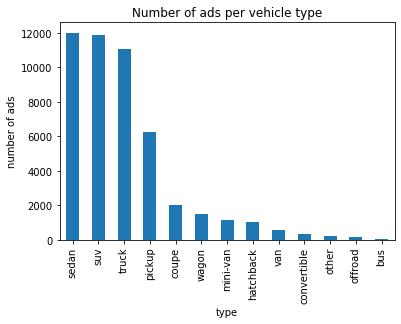

In [161]:
vehicle_grouped['count'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Number of ads per vehicle type')
plt.ylabel('number of ads');

A partir del gráfico de barras anterior, observamos que 'SUV' y 'Sedán' son los dos tipos de vehículos más populares en este conjunto de datos. Vamos a seleccionar un subconjunto de nuestros datos en función de estos 2 tipos.

## Factores de precio

In [173]:
popular_types = df_filtered[df_filtered['type'].isin(['SUV', 'sedan', 'truck'])]

`condition vs price  `

vamos a ver si tienen 50 anuncios como minimo 

In [176]:
popular_types.condition.value_counts()

3    11075
2     9129
4     2160
1      591
5       61
0       51
Name: condition, dtype: int64

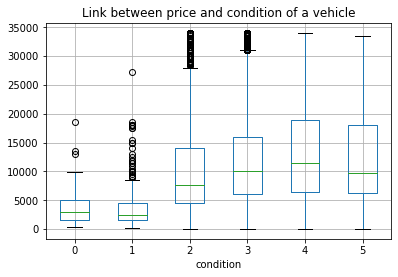

In [177]:
popular_types.boxplot(by='condition', column='price')
plt.suptitle('')
plt.title('Link between price and condition of a vehicle');

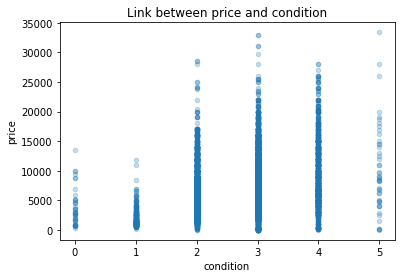

In [169]:
popular_types.plot.scatter(x='condition', y='price', alpha=.25)
plt.title('Link between price and condition');

Vemos una conexión bastante clara: en promedio, cuanto mejor sea la condición de un vehículo, mayor será su precio.

`Transmission type vs price`

In [174]:
popular_types.transmission.value_counts()

automatic    21797
manual         947
other          323
Name: transmission, dtype: int64

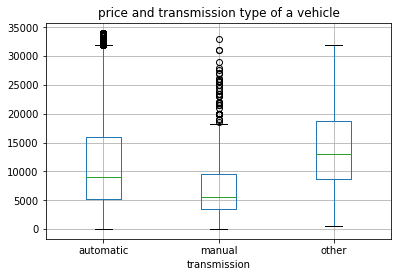

In [175]:
popular_types.boxplot(by='transmission', column='price')
plt.suptitle('')
plt.title('price and transmission type of a vehicle');

Los vehículos con el "otro" tipo de transmisión tienden a ser ligeramente más costosos. Probablemente se explique por el hecho de que estos otros tipos ofrecen más flexibilidad y comodidad al conductor, además de ser más eficientes en términos de consumo de combustible.

`Paint color vs price `

In [165]:
popular_types.paint_color.value_counts()

missing    2161
silver     2031
black      1756
grey       1609
white      1490
blue       1220
red         934
custom      296
brown       254
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

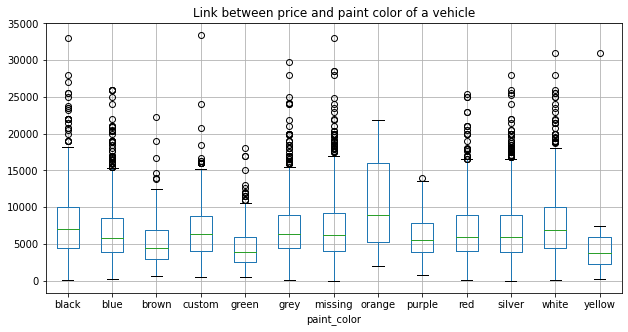

In [166]:
popular_types.boxplot(by='paint_color', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('Link between price and paint color of a vehicle');

No existe una conexión clara entre el precio y el color de la pintura de un coche. Tiene sentido porque el color de la pintura depende principalmente de las preferencias de los clientes y no del precio del coche. Curiosamente, los coches naranjas parecen ser los más caros, pero su número es bastante bajo en este conjunto de datos (solo 88 coches). La mayoría de los coches son negros y plateados.

`Age vs price `

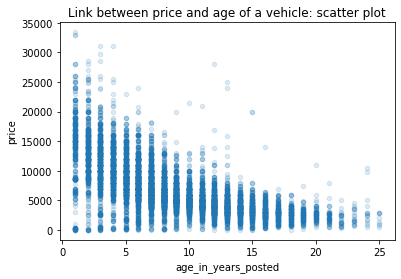

In [167]:
popular_types.plot.scatter(x='age_in_years_posted', y='price', alpha=.15)
plt.title('Link between price and age of a vehicle: scatter plot');

La edad del vehiculo impacta en el precio, a medida que el vehiculo sea mas antiguo el precio bajara

`Mileage vs price  `

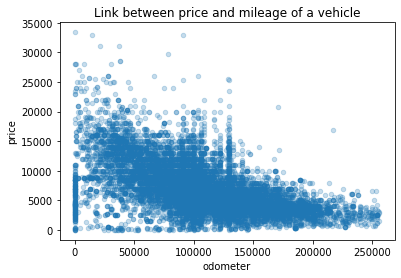

In [168]:
popular_types.plot.scatter(x='odometer', y='price', alpha=.25)
plt.title('Link between price and mileage of a vehicle');

Basándonos en el gráfico de dispersión anterior, podemos observar que a medida que aumenta el kilometraje, el precio del vehículo tiende a disminuir. Esta tendencia es lógica ya que, en promedio, cuanto mayor sea el kilometraje, peor será la condición del automóvil, y por lo tanto, menor será su precio.

## Conclusión general

En este informe se analizaron diferentes características de varios tipos de vehículos con el objetivo de determinar si la edad, el kilometraje, la condición, el tipo de transmisión y el color influyen en el precio de un vehículo. se realizaron los siguientes pasos para determinar los faactores que influyen en el precio

1. Se realizaron estadísticas descriptivas para familiarizarse con los datos.
2. Se corrigieron valores anómalos en la variable objetivo precio y se trataron los valores faltantes en las columnas is_4wd, odometer, model_year, cylinders y paint_color.
3. Se realizaron cálculos auxiliares como la extracción del día de la semana, mes y año en que se publicó el anuncio, la edad del vehículo y el kilometraje promedio por año.
4. Se realizó un análisis exploratorio de los datos que incluyó la identificación y eliminación de valores atípicos utilizando el rango intercuartílico y la identificación de las principales tendencias que influyen en el precio de los vehículos.
5. Se analizaron las principales tendencias que influyen en el precio de los vehículos, incluyendo la edad, el kilometraje, la condición, el tipo de transmisión y el color de los vehículos. Se encontró que la edad, el kilometraje y la condición influyen en el precio, mientras que el tipo de transmisión y el color tienen una relación más débil o inexistente con el precio.


Por ulitmo, Según el reporte, se encontró que varios factores influyen en el precio de un vehículo. En particular, se analizó si la edad, el kilometraje, la condición, el tipo de transmisión y el color del vehículo influían en el precio. Los resultados indican que la edad y el kilometraje influyen negativamente en el precio, es decir, a medida que el vehículo es más antiguo o tiene más kilómetros, su precio tiende a ser más bajo. Por otro lado, la mejor condición del vehículo y algunos tipos de transmisión influyen positivamente en el precio. El color del vehículo no parece tener una relación clara con el precio, aunque se encontró que los vehículos naranjas son los más caros en promedio, aunque su número es bastante bajo en el conjunto de datos.